In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')


FOLDERNAME = 'ece143/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This is later used to use the IMDB reviews
%cd /content/drive/My\ Drive/$FOLDERNAME/

Mounted at /content/drive
/content/drive/My Drive/ece143


# import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('anxiety.csv', encoding='ISO-8859-1')
data.head()

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


# Exploratory Data Analysis

* GAD means **Generalized Anxiety Disorde**, and 1~7 means the question number, GAD-T means the total score.
* SWL means **Satisf action with Life Scale**, and 1~5 means the question number, SWL-T means the total score.
* SPIN means **Social Phobia Inventory**, and 1~17 means the question number, SPIN-T means the total score.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. No.           13464 non-null  int64  
 1   Timestamp        13464 non-null  float64
 2   GAD1             13464 non-null  int64  
 3   GAD2             13464 non-null  int64  
 4   GAD3             13464 non-null  int64  
 5   GAD4             13464 non-null  int64  
 6   GAD5             13464 non-null  int64  
 7   GAD6             13464 non-null  int64  
 8   GAD7             13464 non-null  int64  
 9   GADE             12815 non-null  object 
 10  SWL1             13464 non-null  int64  
 11  SWL2             13464 non-null  int64  
 12  SWL3             13464 non-null  int64  
 13  SWL4             13464 non-null  int64  
 14  SWL5             13464 non-null  int64  
 15  Game             13464 non-null  object 
 16  Platform         13464 non-null  object 
 17  Hours       

In [ ]:
data.isnull().sum()

,0
S. No.,0
Timestamp,0
GAD1,0
GAD2,0
GAD3,0
GAD4,0
GAD5,0
GAD6,0
GAD7,0
GADE,649


In [ ]:
for col in data:
    unique_vars = np.unique(data[col].astype(str))
    num_vars = len(unique_vars)
    if num_vars <= 1000:
        print('The number of value for feature {}: {} -- {}'.format(col, num_vars, unique_vars))
    else:
        top_15 = unique_vars[:15]
        print('The number of values for feature {}: {} -- {} ...'.format(col, num_vars, top_15))

The number of values for feature S. No.: 13464 -- ['1' '10' '100' '10000' '10001' '10002' '10003' '10004' '10005' '10006'
 '10007' '10008' '10009' '1001' '10010'] ...
The number of values for feature Timestamp: 11734 -- ['42052.00437' '42052.0068' '42052.0386' '42052.06804' '42052.08948'
 '42052.13119' '42052.14622' '42052.1593' '42052.19737' '42052.22995'
 '42052.24204' '42052.26022' '42052.27609' '42052.30804' '42052.39588'] ...
The number of value for feature GAD1: 4 -- ['0' '1' '2' '3']
The number of value for feature GAD2: 4 -- ['0' '1' '2' '3']
The number of value for feature GAD3: 4 -- ['0' '1' '2' '3']
The number of value for feature GAD4: 4 -- ['0' '1' '2' '3']
The number of value for feature GAD5: 4 -- ['0' '1' '2' '3']
The number of value for feature GAD6: 4 -- ['0' '1' '2' '3']
The number of value for feature GAD7: 4 -- ['0' '1' '2' '3']
The number of value for feature GADE: 5 -- ['Extremely difficult' 'Not difficult at all' 'Somewhat difficult'
 'Very difficult' 'nan']
The

# Data Preprocessing(each column seperately)

remove column 'S. No.', 'Timestamp', 'highestleague'

In [ ]:
data = data.drop(columns=['S. No.', 'Timestamp', 'highestleague'])

**Gender**: only remain male and female

In [ ]:
data['Gender'].value_counts()

,count
Gender,
Male,12699
Female,713
Other,52


In [ ]:
data = data[data['Gender'] != 'Other']

**Narcissism**: fills missing values (NaN) in the "Narcissism" column with the median value of that column

In [ ]:
data['Narcissism'] = data['Narcissism'].fillna(data['Narcissism'].median())

**streams**: groups the "streams" column into bins and fills missing values (NaN) in the "streams" column with its median value

<ipython-input-16-98acebc1c2c4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = data.groupby(pd.cut(data['streams'], bins=[-1, 40, 80, 120, 160, 200]))['streams'].count()


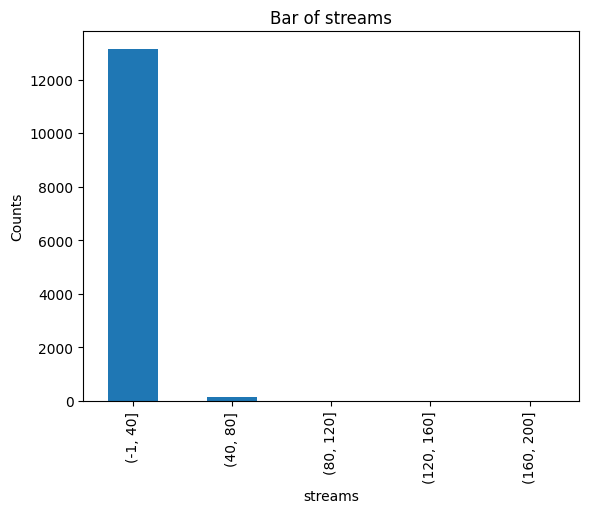

In [ ]:
group_counts = data.groupby(pd.cut(data['streams'], bins=[-1, 40, 80, 120, 160, 200]))['streams'].count()

group_counts.plot(kind='bar')

plt.xlabel("streams")
plt.ylabel("Counts")
plt.title("Bar of streams")
plt.show()

In [ ]:
data['streams'] = data['streams'].fillna(data['streams'].median())

**Game**: visualize the frequency of different "Game" categories in the dataset

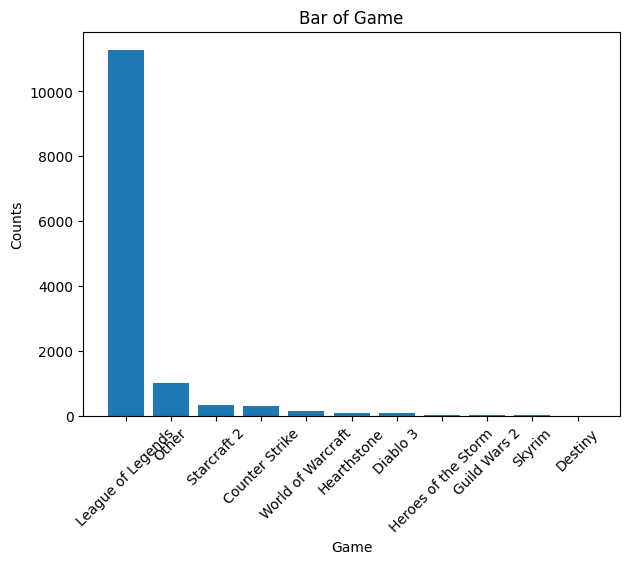

In [ ]:
plt.bar(data['Game'].value_counts().index, data['Game'].value_counts().values)
plt.xlabel("Game")
plt.ylabel("Counts")
plt.title("Bar of Game")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

**Platform**:visualize the frequency of different "Platform" categories in the dataset

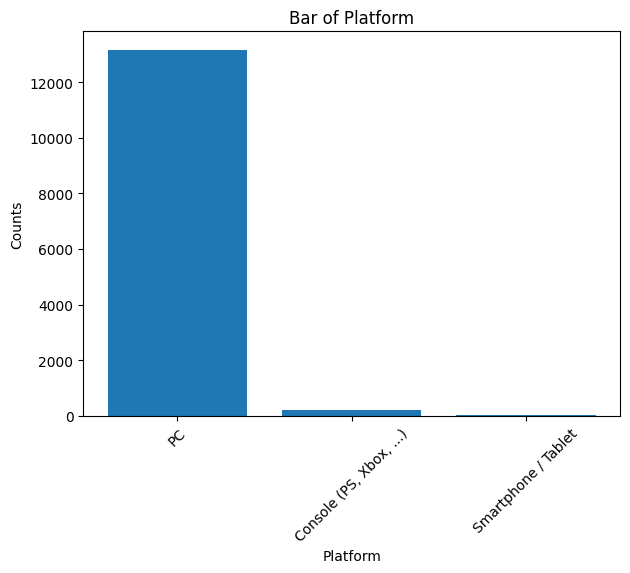

In [ ]:
plt.bar(data['Platform'].value_counts().index, data['Platform'].value_counts().values)
plt.xlabel("Platform")
plt.ylabel("Counts")
plt.title("Bar of Platform")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Replace certain values in the "Platform" column with new labels. Change 'Console (PS, Xbox, ...)' to 'Console', 'Smartphone / Tablet' to 'MobileDevice'

In [ ]:
data['Platform'] = data['Platform'].replace({'Console (PS, Xbox, ...)': 'Console',
                                     'Smartphone / Tablet': 'MobileDevice'})

**Accept**: count the number of occurrences of each unique value in the accept column of the data DataFrame

In [ ]:
data['accept'].value_counts()

,count
accept,
Accept,13000


Since we only have one unique value in the accept column, so we remove the 'accept' column from the data DataFrame

In [ ]:
data = data.drop(columns=['accept'])

**Work**

 Visualize the distribution of values in the 'Work' column of the data DataFrame

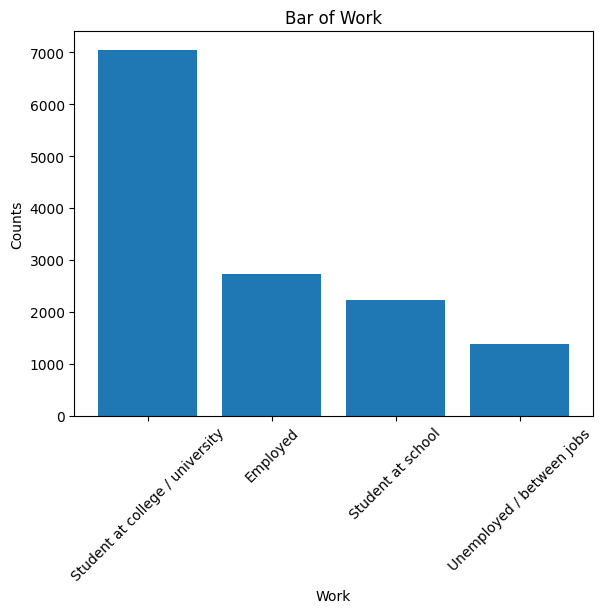

In [ ]:
plt.bar(data['Work'].value_counts().index, data['Work'].value_counts().values)
plt.xlabel("Work")
plt.ylabel("Counts")
plt.title("Bar of Work")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

1. Filling missing values (NaN) in the Work column of the data DataFrame with the value 'Unemployed / between jobs'
2. Replacing specific values with more concise labels for standardization.

In [ ]:
data['Work'] = data['Work'].fillna('Unemployed / between jobs')
data['Work'] = data['Work'].replace({'Student at college / university': 'CollegeStu',
                                     'Student at school': 'SchoolStu', 'Unemployed / between jobs':'Unemployed'})

**Degree**: Visualize the distribution of values in the 'Degree' column of the data DataFrame

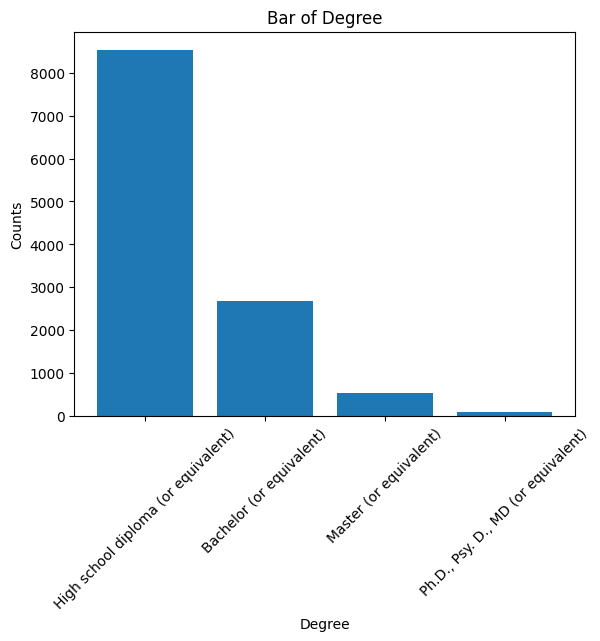

In [ ]:
plt.bar(data['Degree'].value_counts().index, data['Degree'].value_counts().values)
plt.xlabel("Degree")
plt.ylabel("Counts")
plt.title("Bar of Degree")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

1. replace missing values (NaN) in the 'Degree' column of the data DataFrame with the string 'Other'
2. Replacing specific values with more concise labels for standardization.

In [ ]:
data['Degree'] = data['Degree'].fillna('Other')
data['Degree'] = data['Degree'].replace({'Bachelor\xa0(or equivalent)': 'BC',
                                         'High school diploma (or equivalent)': 'HS',
                                         'Master\xa0(or equivalent)': 'MA',
                                         'Ph.D., Psy. D., MD (or equivalent)': 'DC'})

**Reference**:visualize the frequency distribution of the values in the 'Reference' column of the data DataFrame

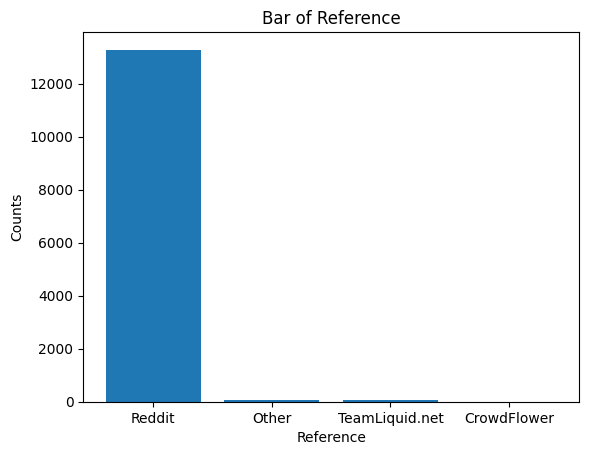

In [ ]:
plt.bar(data['Reference'].value_counts().index, data['Reference'].value_counts().values)
plt.xlabel("Reference")
plt.ylabel("Counts")
plt.title("Bar of Reference")
plt.show()

 replace missing values (NaN) in the 'Reference' column of the data DataFrame with the string 'Other'

In [ ]:
data['Reference'] = data['Reference'].fillna('Other')

**GADE**

visualize the frequency distribution of the values in the 'GADE' column of the data DataFrame

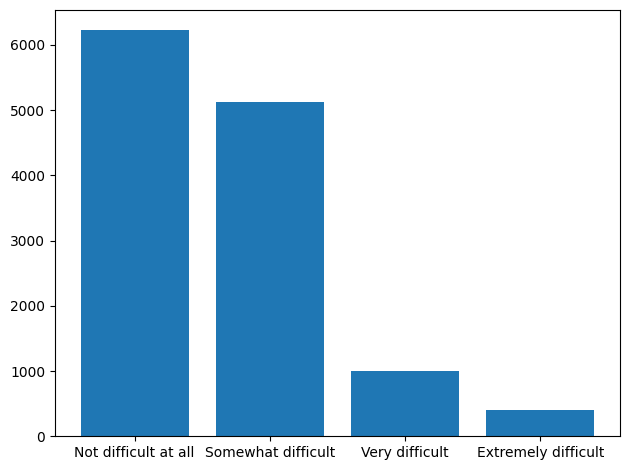

In [ ]:
plt.bar(data['GADE'].value_counts().index, data['GADE'].value_counts().values)
plt.tight_layout()
plt.show()

 fill missing values (NaN) in the 'GADE' column of the data DataFrame with the most frequent value (mode) of that column

In [ ]:
data['GADE'] = data['GADE'].fillna(data['GADE'].mode()[0])

**Age**:visualizes the frequency distribution of the 'Age' column in the data DataFrame, divided into age groups or bins

<ipython-input-31-313ed70ee6c4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = data.groupby(pd.cut(data['Age'], bins=[10, 20, 30, 40, 50, 60, 70]))['Age'].count()


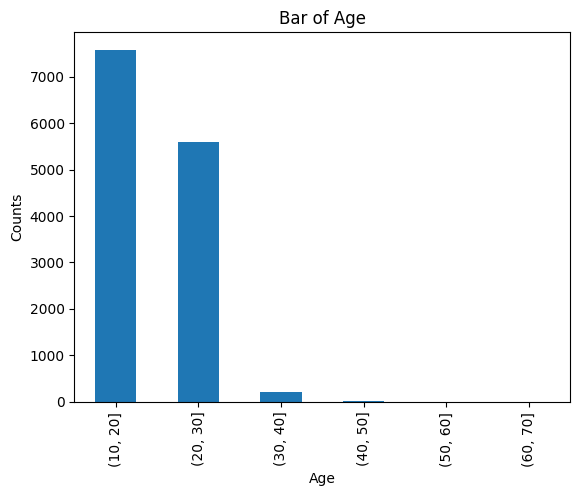

In [ ]:
group_counts = data.groupby(pd.cut(data['Age'], bins=[10, 20, 30, 40, 50, 60, 70]))['Age'].count()

group_counts.plot(kind='bar')

plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Bar of Age")
plt.show()

fill missing values (NaN) in the 'Age' column of the data DataFrame with the median value of the 'Age' column

In [ ]:
data['Age'] = data['Age'].fillna(data['Age'].median())

**HOURS**:visualizes the frequency distribution of the 'Hours' column in the data DataFrame, divided into specified bins

<ipython-input-33-6f25a2ef4d4a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = data.groupby(pd.cut(data['Hours'], bins=[-1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 190]))['Hours'].count()


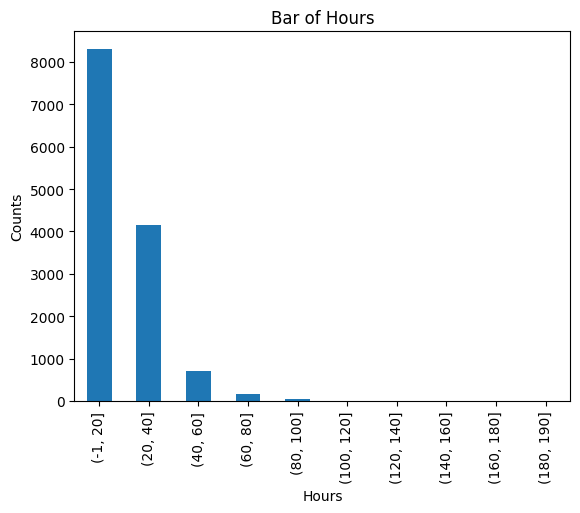

In [ ]:
group_counts = data.groupby(pd.cut(data['Hours'], bins=[-1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 190]))['Hours'].count()

group_counts.plot(kind='bar')

plt.xlabel("Hours")
plt.ylabel("Counts")
plt.title("Bar of Hours")
plt.show()


fill missing values (NaN) in the 'Hours' column of the data DataFrame with the median value of the 'Hours' column

In [ ]:
data['Hours'] = data['Hours'].fillna(data['Hours'].median())

**Residence**:visualize the distribution of values in the 'Residence' column of the data DataFrame

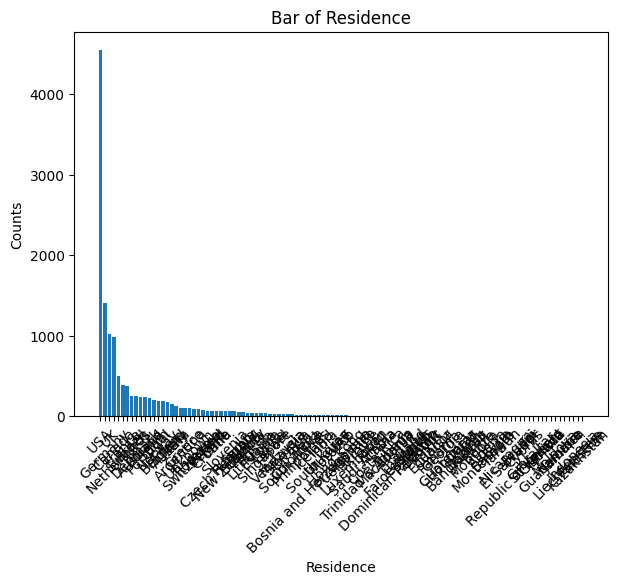

In [ ]:
plt.bar(data['Residence'].value_counts().index, data['Residence'].value_counts().values)
plt.xlabel("Residence")
plt.ylabel("Counts")
plt.title("Bar of Residence")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

1. Removes columns 'Residence_ISO3', 'Birthplace_ISO3', and 'Birthplace' which are not needed for the analysis because these columns provide redundant information.
2. Fills any missing values in the 'Residence' column with the most common residence value.

In [ ]:
data = data.drop(columns=['Residence_ISO3', 'Birthplace_ISO3', 'Birthplace'])
data['Residence'] = data['Residence'].fillna(data['Residence'].mode()[0])

**League**

print the number of different league

In [ ]:
for league, count in data['League'].value_counts().items():
    print(f"{league}: {count}")


Gold: 966
Silver: 646
Platinum: 634
Diamond: 548
gold: 316
Unranked: 262
Diamond 5: 217
silver: 212
Gold V: 203
Gold 1: 202
Gold 3: 196
Silver 1: 196
Gold 5: 194
Silver 2: 179
Gold 2: 171
platinum: 167
diamond: 152
Silver 3: 151
Bronze: 136
Gold 4: 127
Platinum 3: 122
unranked: 118
Silver 4: 118
Platinum 2: 117
Platinum 1: 113
Platinum 5: 106
Diamond V: 99
Silver 5: 97
Diamond 3: 85
Platinum 4: 83
Platinum V: 80
Gold IV: 77
Diamond 4: 76
gold 5: 67
Diamond 1: 66
Silver III: 65
Gold III: 61
gold 3: 58
Bronze 1: 57
Plat 5: 55
Master: 55
gold 1: 54
Plat: 54
Silver IV: 53
Silver V: 53
Challenger: 50
Gold : 50
Silver II: 48
Silver I: 48
gold 2: 48
Diamond 2: 48
silver 3: 47
Platinum IV: 46
Plat 3: 46
Bronze 2: 46
silver 1: 45
diamond 5: 45
Platinum III: 44
Bronze 3: 43
Gold II: 43
bronze: 42
plat: 41
Plat 1: 41
Platinum II: 39
Plat 4: 36
plat 3: 36
Plat 2: 36
silver 2: 36
platinum 3: 35
Plat V: 35
plat 2: 34
Platin: 33
Masters: 31
Silver : 30
Gold I: 30
plat 5: 30
gold 4: 29
platinum 1: 29


Categorize the values in the 'League' column into broader categories based on certain keywords using regular expressions

In [ ]:
data.loc[data['League'].str.contains(r'\bgold|\bgd|\bg1|\bg2|\bg3|\bg4|\bg5', case=False, na=False, regex=True), 'League'] = 'Gold'
data.loc[data['League'].str.contains(r'\bsilver|\bs1|\bs2|\bs3|\bs4|\bs5|\bsliver', case=False, na=False, regex=True), 'League'] = 'Silver'
data.loc[data['League'].str.contains(r'\bdiamond|\bd1|\bd2|\bd3|\bd4|\bd5', case=False, na=False, regex=True), 'League'] = 'Diamond'
data.loc[data['League'].str.contains(r'\bplatinum|\bplat|\bp1|\bp2|\bp3|\bp4|\bp5', case=False, na=False, regex=True), 'League'] = 'Platinum'
data.loc[data['League'].str.contains(r'\bbronze|\bb1|\bb2|\bb3|\bb4|\bb5', case=False, na=False, regex=True), 'League'] = 'Bronze'
data.loc[data['League'].str.contains(r'\bun|\bnone|\bna', case=False, na=False, regex=True), 'League'] = 'Unranked'
data.loc[data['League'].str.contains(r'\bmaster|\bm1|\bm2|\bm3|\bm4|\bm5', case=False, na=False, regex=True), 'League'] = 'Master'
data.loc[data['League'].str.contains(r'\bchallenger', case=False, na=False, regex=True), 'League'] = 'Challenger'

Filter the 'League' column by the frequency of occurrences of values. We remove any rows where the 'League' value appears fewer than 15 times

In [ ]:
league_counts = data['League'].value_counts()
want_league = league_counts[league_counts>=15].index
data = data[data['League'].isin(want_league)]

**Playstyle**

print the number of different playstyle



In [ ]:
for Playstyle, count in data['Playstyle'].value_counts().items():
    print(f"{Playstyle}: {count}")


Multiplayer - online - with real life friends: 4727
Multiplayer - online - with strangers: 3497
Multiplayer - online - with online acquaintances or teammates: 2242
Singleplayer: 483
Multiplayer - offline (people in the same room): 26
All of the above: 6
all of the above: 5
Its pretty 33%: SP(KSP), MP friends(CS), MP strangers(LoL)): 1
Multiplayer-online-real life friends and online acquaintances: 1
multi-online-with strangers & real life friends: 1
MP with strangers and teammates are equal: 1
Multiplayer - online - with gf: 1
Multiplayer-online-with real life friends and strangers: 1
Depends: 1
Ranked, count this for Multiplayer with strangers if more appropriate: 1
I play with people I meet online and real life friends.: 1
Multiplayer-online-with real life friends and online teammates: 1
Duo Queue with one good friend, else solo: 1
Multiplayer - online - mix of real life and online friends: 1
Multiplayer - Online - With friends and strangers: 1
3 last options. : 1
all of em ?: 1
1 IRL

Select rows from the 'Playstyle' column that contain the word "all" (case-insensitive) and prints the filtered results

In [ ]:
filtered_data = data['Playstyle'][data['Playstyle'].str.contains(r'\ball\b', case=False, na=False, regex=True)]

print(filtered_data)


17                                        all of the above
495                     A combination of all of the aboive
571                               It's really a bit of all
1247     I duo with my boyfriend pretty much all the time.
2100              A combination of all Multiplayer options
2668                                      All of the above
2944                pretty much balanced of all you listed
3361                                      All of the above
3411                                      all of the above
3888                 All multiplayer options listed above.
3902                                      All of the above
4596                                        All the above 
4640              All Multiplayer - Online categories fit.
4731                                           All options
4869                                          all of these
5422                                      all of the above
7136                                          all of abo

Replacing values that contain the words "all", "above", or "them" with the string 'All'

In [ ]:
data.loc[data['Playstyle'].str.contains(r'\ball|\babove|\bthem', case=False, na=False, regex=True), 'Playstyle'] = 'All'

Filter the 'Playstyle' column by the frequency of occurrences of values. We remove any rows where the 'Playstyle' value appears fewer than 25 times

In [ ]:
Playstyle_counts = data['Playstyle'].value_counts()
want_Playstyle = Playstyle_counts[Playstyle_counts>=25].index
data = data[data['Playstyle'].isin(want_Playstyle)]

Replaces specific values in the 'Playstyle' column of the data DataFrame with new labels.

In [ ]:
data['Playstyle'] = data['Playstyle'].replace({'Multiplayer - offline (people in the same room)': 'offline',
                                     'Multiplayer - online - with online acquaintances or teammates': 'online acquaintances',
                                     'Multiplayer - online - with real life friends': 'online real life friends',
                                     'Multiplayer - online - with strangers': 'online strangers'})

**earnings**

print the number of different earnings

In [ ]:
for earnings, count in data['earnings'].value_counts().items():
    print(f"{earnings}: {count}")


I play for fun: 9825
I play mostly for fun but earn a little on the side (tournament winnings, streaming, etc): 881
I earn a living by playing this game: 39
I play to win: 3
i try: 2
I play for fun, but am starting to stream. : 1
I don't earn jack ****: 1
I play for relaxation and it gives me a few minutes to release everything : 1
I play because it's installed: 1
competitive drive: 1
Fun and routine: 1
I play because it is the only way i have to show i'm good at something: 1
Play for emotion relief: 1
I play to win and for improvement and want to earn a living playing this game: 1
Playing for fun, considering streaming: 1
I play for fun atm but would like to earn a little money from it: 1
I play for competition: 1
used to earn money, moved, now cant.: 1
I play for fun and to keep cantact with my old friends from school: 1
I play for fun but I'm exploring options to turn it into a career.: 1
Playing for Fun but would like to earn smth with it but im too bad: 1
playing to keep myself oc

Replaces specific values in the 'earnings' column of the data DataFrame with new labels.

In [ ]:
data['earnings'] = data['earnings'].replace({'I play for fun': 'ForFun',
                                     'I play mostly for fun but earn a little on the side (tournament winnings, streaming, etc)': 'Fun and else',
                                     'I earn a living by playing this game': 'Earn',
                                     'I play to win': 'Win'})

Filter the 'earnings' column by the frequency of occurrences of values. We remove any rows where the 'earnings' value appears fewer than 25 times

In [ ]:
earnings_counts = data['earnings'].value_counts()
want_earnings = earnings_counts[earnings_counts>=25].index
data = data[data['earnings'].isin(want_earnings)]

**whyplay**

print the number of different reason for playing

In [ ]:
for whyplay, count in data['whyplay'].value_counts().items():
    print(f"{whyplay}: {count}")


having fun: 4105
improving: 4062
winning: 1756
relaxing: 470
All of the above: 15
all of the above: 14
Improving and having fun: 7
improving and having fun: 5
winning and improving: 5
having fun and improving: 4
distraction: 4
relaxing and having fun: 3
Wasting time: 3
both relaxing and having fun: 2
playing with friends: 2
winning and relaxing: 2
winning while having fun: 2
all above: 2
Both winning and having fun: 2
All the above: 2
Winning while having fun: 2
Improving and Having fun: 2
A mix of everything: 1
having something to do: 1
Improving/Having Fun/Teaching others: 1
Feeling like I'm playing my role well: 1
getting away from real life: 1
Winning AND having fun!: 1
Learning: 1
Winning, Improving, and having fun: 1
Having fun, but who plays to lose? ;): 1
having fun in some and winning in some : 1
depends on game mode (ranked obviously winning, else for fun): 1
Improving, having fun and relaxing. : 1
backdooring in ARAMs: 1
Keeping my mind off my shortcomings.: 1
all of the abo

1. Replaces values containing "all" or "above" with 'All'.
2. Replaces values containing "Improving" or "improve" with 'Improving'.

In [ ]:
data.loc[data['whyplay'].str.contains(r'\ball|\babove', case=False, na=False, regex=True), 'whyplay'] = 'All'
data.loc[data['whyplay'].str.contains(r'\bImproving|\bimprove', case=False, na=False, regex=True), 'whyplay'] = 'Improving'

Filter the 'whyplay' column by the frequency of occurrences of values. We remove any rows where the 'whyplay' value appears fewer than 25 times

In [ ]:
whyplay_counts = data['whyplay'].value_counts()
want_whyplay = whyplay_counts[whyplay_counts>=25].index
data = data[data['whyplay'].isin(want_whyplay)]

Transforms the values in columns 'SWL1' to 'SWL5' by subtracting each value from 7. This is used to invert the scale.

In [ ]:
for i in range(1, 6):
    data['SWL'+str(i)] = 7-data['SWL'+str(i)]

Drops rows from the data DataFrame where there are missing values (NaN) in the columns SPIN1, SPIN2, ..., SPIN17

In [ ]:
for i in range(1, 18):
    data = data.dropna(subset=[f'SPIN{i}'])

Reset the index after performing operations

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data.shape

(10046, 48)

Correlation matrix with heatmap

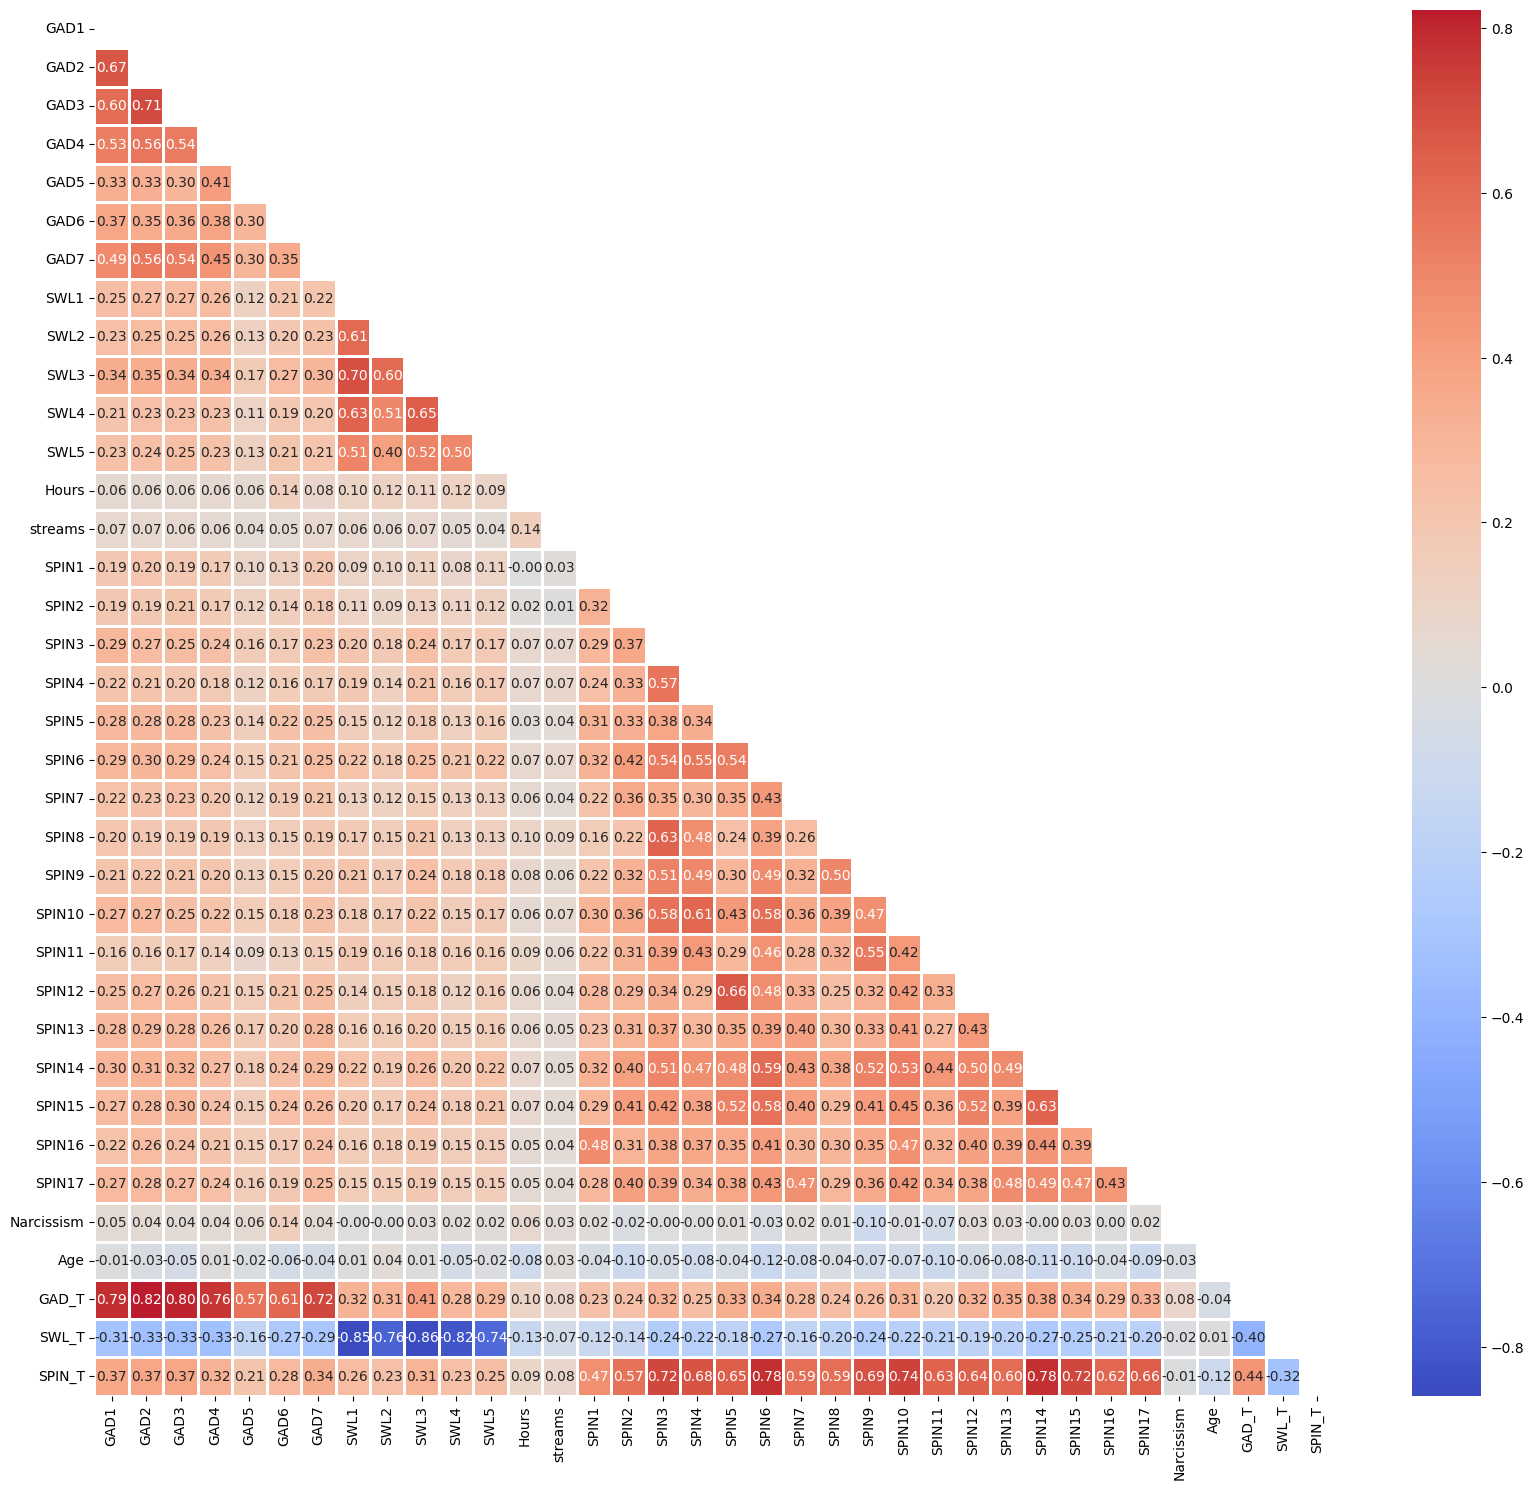

In [ ]:
personal_corr_matrix = data.drop(columns = ['GADE', 'Game', 'Platform', 'earnings', 'whyplay', 'League',
                                            'Gender', 'Work', 'Degree', 'Residence', 'Playstyle', 'Reference']).corr()

mask = np.triu(np.ones_like(personal_corr_matrix, dtype=bool))

plt.figure(figsize=(20,18))
sns.heatmap(personal_corr_matrix, cmap='coolwarm', center=0, fmt=".2f", annot=True, linewidths=1, mask=mask)
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10046 entries, 0 to 10045
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GAD1        10046 non-null  int64  
 1   GAD2        10046 non-null  int64  
 2   GAD3        10046 non-null  int64  
 3   GAD4        10046 non-null  int64  
 4   GAD5        10046 non-null  int64  
 5   GAD6        10046 non-null  int64  
 6   GAD7        10046 non-null  int64  
 7   GADE        10046 non-null  object 
 8   SWL1        10046 non-null  int64  
 9   SWL2        10046 non-null  int64  
 10  SWL3        10046 non-null  int64  
 11  SWL4        10046 non-null  int64  
 12  SWL5        10046 non-null  int64  
 13  Game        10046 non-null  object 
 14  Platform    10046 non-null  object 
 15  Hours       10046 non-null  float64
 16  earnings    10046 non-null  object 
 17  whyplay     10046 non-null  object 
 18  League      10046 non-null  object 
 19  streams     10046 non-nul

After data cleaning, there is no empty data in the dataset

In [ ]:
data.isnull().sum()

,0
GAD1,0
GAD2,0
GAD3,0
GAD4,0
GAD5,0
GAD6,0
GAD7,0
GADE,0
SWL1,0
SWL2,0


In [ ]:
for col in data:
    unique_vars = np.unique(data[col].astype(str))
    num_vars = len(unique_vars)
    if num_vars <= 1000:
        print('The number of value for feature {}: {} -- {}'.format(col, num_vars, unique_vars))
    else:
        top_15 = unique_vars[:15]
        print('The number of values for feature {}: {} -- {} ...'.format(col, num_vars, top_15))

The number of value for feature GAD1: 4 -- ['0' '1' '2' '3']
The number of value for feature GAD2: 4 -- ['0' '1' '2' '3']
The number of value for feature GAD3: 4 -- ['0' '1' '2' '3']
The number of value for feature GAD4: 4 -- ['0' '1' '2' '3']
The number of value for feature GAD5: 4 -- ['0' '1' '2' '3']
The number of value for feature GAD6: 4 -- ['0' '1' '2' '3']
The number of value for feature GAD7: 4 -- ['0' '1' '2' '3']
The number of value for feature GADE: 4 -- ['Extremely difficult' 'Not difficult at all' 'Somewhat difficult'
 'Very difficult']
The number of value for feature SWL1: 7 -- ['0' '1' '2' '3' '4' '5' '6']
The number of value for feature SWL2: 7 -- ['0' '1' '2' '3' '4' '5' '6']
The number of value for feature SWL3: 7 -- ['0' '1' '2' '3' '4' '5' '6']
The number of value for feature SWL4: 7 -- ['0' '1' '2' '3' '4' '5' '6']
The number of value for feature SWL5: 7 -- ['0' '1' '2' '3' '4' '5' '6']
The number of value for feature Game: 11 -- ['Counter Strike' 'Destiny' 'Diablo

save the cleaned dataset

In [ ]:
from google.colab import files
data.to_csv('cleaned_data.csv', index=False)  # save document
files.download('cleaned_data.csv')  # download

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>